In [1]:
import pandas as pd
df = pd.read_csv("conversational_models.csv")
df

,Model,Response_Relevance,Context_Retention,Inference_Time_ms,Model_Size_MB,Training_Data_Size_GB,Energy_Consumption_kWh
0,GPT2_Medium_Dialogue,0.80,0.75,95,1500,40,50
1,GPT_Neo_1.3B,0.83,0.80,140,2600,800,75
2,BLOOM_560M,0.82,0.78,120,1100,350,65
3,FLAN_T5_Base,0.85,0.82,100,990,780,60
4,OPT_1.3B,0.84,0.81,145,2500,180,80
5,LaMDA_Style_Model,0.88,0.86,160,2800,1000,90


In [1]:
!pip install Topsis-Aishita-102303744



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!topsis conversational_models.csv "0.25,0.25,0.15,0.10,0.15,0.10" "+,+,-,-,+,-" result.csv


TOPSIS completed successfully


C:\Users\Dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\topsis_aishita_102303744\topsis.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not np.all(data.applymap(np.isreal)):


In [3]:
result = pd.read_csv("result.csv")
result

,Model,Response_Relevance,Context_Retention,Inference_Time_ms,Model_Size_MB,Training_Data_Size_GB,Energy_Consumption_kWh,Topsis Score,Rank
0,GPT2_Medium_Dialogue,0.80,0.75,95,1500,40,50,0.327993,5
1,GPT_Neo_1.3B,0.83,0.80,140,2600,800,75,0.617845,3
2,BLOOM_560M,0.82,0.78,120,1100,350,65,0.437962,4
3,FLAN_T5_Base,0.85,0.82,100,990,780,60,0.791486,1
4,OPT_1.3B,0.84,0.81,145,2500,180,80,0.178727,6
5,LaMDA_Style_Model,0.88,0.86,160,2800,1000,90,0.641857,2


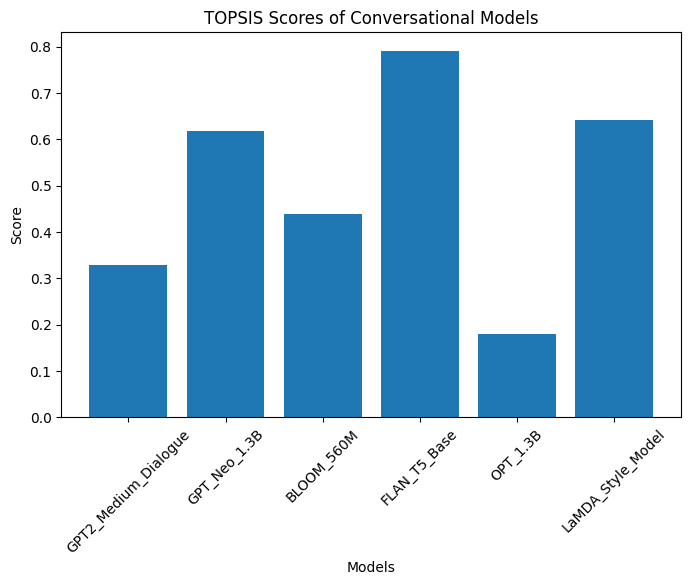

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(result["Model"], result["Topsis Score"])
plt.title("TOPSIS Scores of Conversational Models")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.savefig("topsis_scores.png")
plt.show()


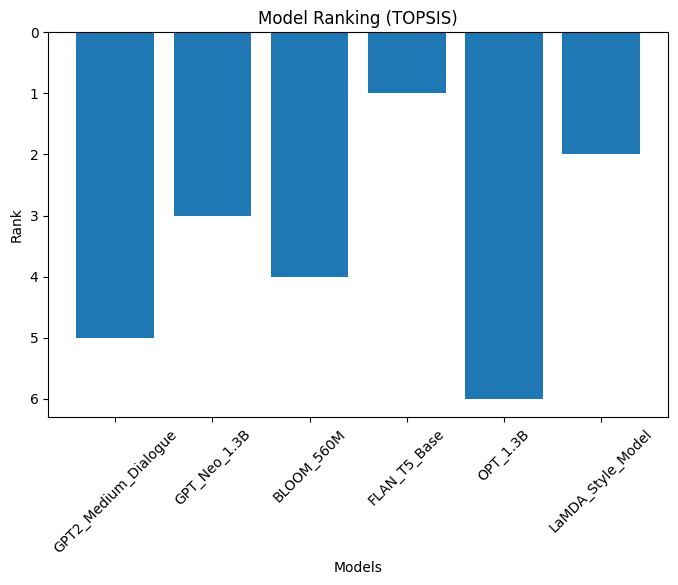

In [5]:
plt.figure(figsize=(8,5))
plt.bar(result["Model"], result["Rank"])
plt.title("Model Ranking (TOPSIS)")
plt.xlabel("Models")
plt.ylabel("Rank")
plt.gca().invert_yaxis()
plt.xticks(rotation=45)
plt.savefig("topsis_ranking.png")
plt.show()
